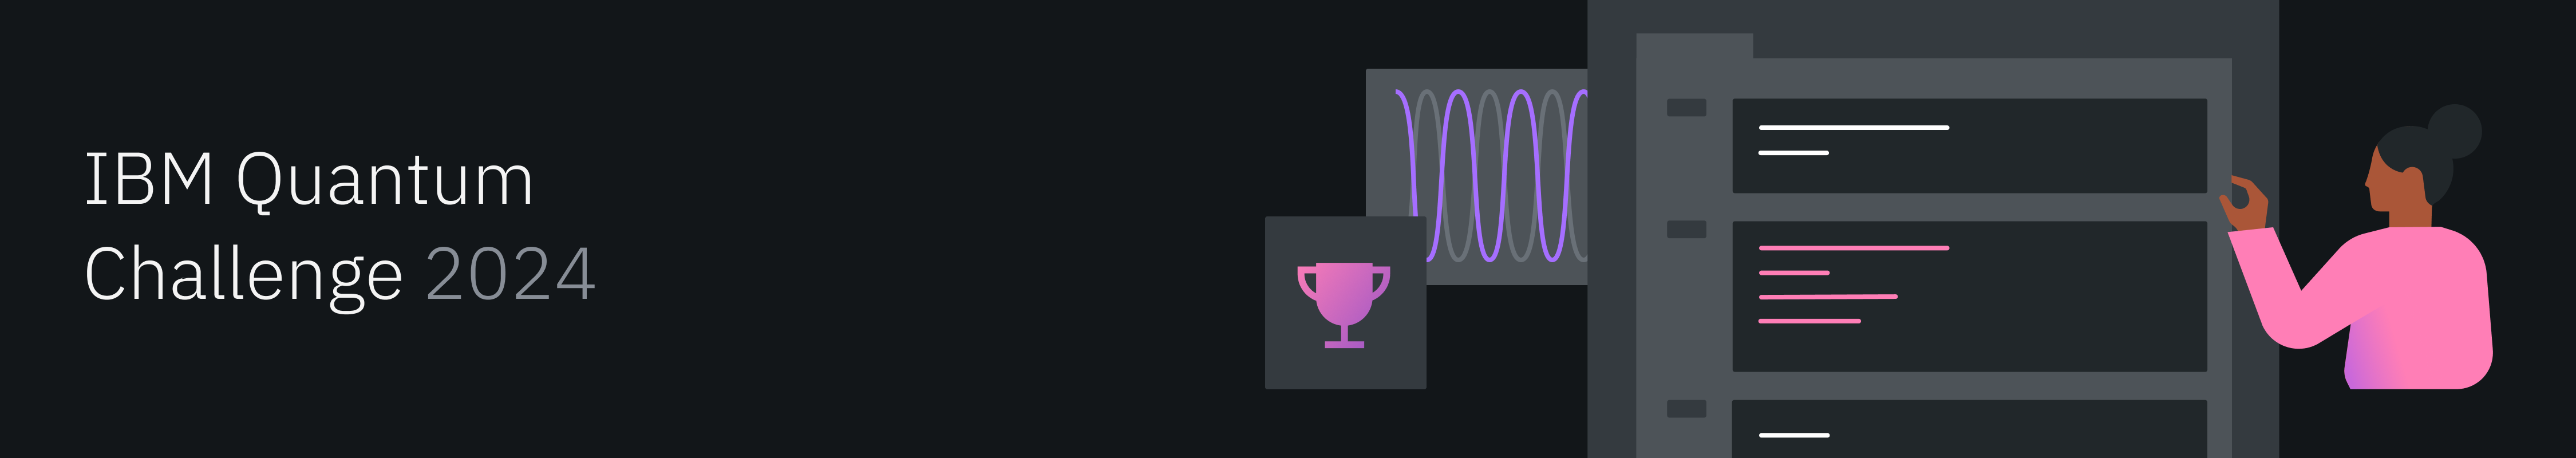

# Lab 3: What's Next - Sneak Preview of AI-Powered Transpilation with Qiskit Transpiler Service

# Table of Contents

* [Introduction to AI-Powered Transpiler Passes](Introduction-to-AI-Powered-Transpiler-Passes)
    * [Exercise 1](#exercise1)
    * [Exercise 2](#exercise2)

# Imports

As always we'll start with the optional installs. You only need to use the Qiskit install and API Token cells if you don't have those saved from a previous lab.

In [ ]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are using python 3.10 or 3.11 for compatibility of the required packages
%pip install qiskit[visualization]==1.0.2
%pip install qiskit-ibm-runtime
%pip install qiskit-aer
%pip install graphviz
%pip install qiskit-transpiler-service
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git -U

In [1]:
### Save API Token, if needed

%set_env QXToken=deleteThisAndPasteYourTokenHere

# Make sure there is no space between the equal sign
# and the beginning of your token

env: QXToken=295e18d441942a00358c6da5647f450b6f4e2905693261154334388a92a82cc9e0466dbc227bb59279fa4442e5c26bd6c3fe567d1777e916c1ca668e277250f4


In [2]:
# qc-grader should be 0.18.10 (or higher)
import qc_grader

qc_grader.__version__

'0.18.13'

In [3]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_transpiler_service.transpiler_service import TranspilerService

In [4]:
# Import for grader
from qc_grader.challenges.iqc_2024 import grade_lab3_ait_ex1, grade_lab3_ait_ex2

## Introduction

Welcome to Lab 3! Today, we are thrilled to give you an exclusive sneak peek into some of the exciting new features that are being developed for the Qiskit stack. This educational challenge is split into separate notebooks, each showcasing a unique and groundbreaking innovation and invites you to explore and test these new features. Dive in to explore tools like the Circuit Knitting Toolbox to simplify complex quantum circuits, experience the workflow to setup seamless integration of quantum and classical computing with Qiskit Serverless and have a chance to leverage AI-Powered tools like the Qiskit Code Assistant for code generation and circuit optimization with AI-Powered Transpiler Passes. Dive in and discover how these innovations are set to revolutionize quantum development!

<div class="alert alert-block alert-danger">

Please note, **these features are in beta and release preview**, so you most likely will encounter some bugs. Have fun experimenting and pushing the boundaries of quantum development!

</div>

# Introducing AI-powered transpiler passes using Qiskit Transpiler service

In this hands-on exercise, you'll have the opportunity to explore the cutting-edge capabilities of AI-powered transpiler passes in Qiskit. With the recent beta release of the Qiskit Transpiler Service, you can now leverage AI and IBM Cloud&reg; resources to optimize your quantum circuits more efficiently.

Transpiling abstract quantum circuits to match the constraints and characteristics of specific quantum devices is a crucial step in a quantum computing workflow. As we learned in lab 2, this process traditionally relies on heuristic algorithms, but the new AI-powered transpiler passes offer the potential for more efficient, and higher-quality transpilation while being fast enough for practical applications.  For this challenge, we are providing you with beta access to the Qiskit Transpiler Service to experiment with.

**To learn more about the tool, please check out the full [blog](https://www.ibm.com/quantum/blog/ai-transpiler-passes) and [arxiv paper](https://arxiv.org/abs/2405.13196).** Documentation for the tool can be found in the [IBM Quantum Platform docs](https://docs.quantum.ibm.com/transpile/qiskit-transpiler-service).

In this exercise, you'll get to experiment with these AI-powered transpiler passes using this beta release preview, compare them to traditional methods, and understand how they can enhance your quantum computing workflows. Let's dive in and start exploring the future of quantum circuit optimization!

## Step 1: Create your circuit

Begin by creating a quantum circuit using Qiskit's circuit library. In this step, you'll define the structure and gates of your quantum circuit. This will serve as the basis for the subsequent transpilation and optimization tasks. We will use a very similar circuit to the one shown in the original paper [paper](https://arxiv.org/abs/2405.13196)

<div class="alert alert-block alert-info">

**IMPORTANT:** Please ensure you have the `qiskit-transpiler-service` package installed and your token set up to use the IBM Quantum Platform. You can find instructions on how to do this in the documentation link [here](https://docs.quantum.ibm.com/start/setup-channel#set-up-to-use-ibm-quantum-platform)

</div>

In [5]:
NUM_QUBITS = 61

Original circuit -> Depth: 65, CNOTs: 61


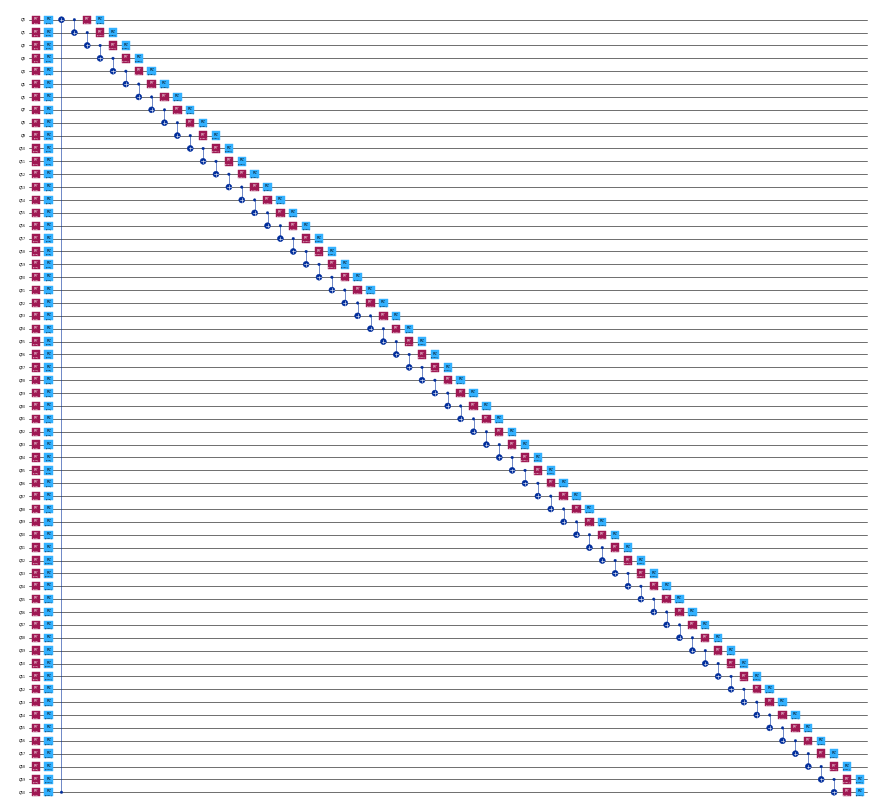

In [6]:
circuit = EfficientSU2(NUM_QUBITS, entanglement="circular", reps=1).decompose()

print(f"Original circuit -> Depth: {circuit.depth()}, CNOTs: {circuit.num_nonlocal_gates()}")
circuit.draw(fold=-1, output="mpl", style="iqp", scale=0.2)

## Step 2: Transpile and Optimize your circuit

In this step, you'll transpile and optimize your circuit using the Qiskit Transpiler Service. We will perform this process twice: first without AI and then with AI-powered transpiler passes. We will be using the Qiskit Transpiler Service for this section. The Qiskit Transpiler Service provides both heuristic and AI-powered transpilation capabilities on the cloud. We can leverage running transpilation tasks to benefit from IBM Quantum™ cloud resources and advanced AI-powered transpiler passes. **For more information, refer to the Qiskit Transpiler Service documentation [here](https://docs.quantum.ibm.com/transpile/qiskit-transpiler-service)**


In [9]:
!pip install qiskit-transpiler-service

#### Qiskit Transpiler Service - without AI
Without AI: Use the traditional heuristic methods available in the Qiskit Transpiler service to transpile your circuit.

<a id="exercise1"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 1:</b> 

Let's set up the Qiskit Transpiler service to transpile our circuit on cloud. Ensure you have the latest version of Qiskit Transpiler Service installed and configured. We'll use the `ibm_brisbane` backend for this exercise. Set the backend and configure the transpiler with an optimization level of `3`, **without the AI flag turned on**.
</div>

In [12]:
# https://docs.quantum.ibm.com/transpile/qiskit-transpiler-service

transpiler_ai_false = TranspilerService( 
    backend_name="ibm_brisbane",
    optimization_level=3,
    ai="false"
)

In [13]:
# Submit your answer using following code

grade_lab3_ait_ex1(transpiler_ai_false) # Expected result type: TranspilerService

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [14]:
circuit_ai_false = transpiler_ai_false.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


<div class="alert alert-block alert-warning">

If you received an error `FileNotFoundError: [Errno 2] No such file or directory: ‘/root/.qiskit/qiskit-ibm.json’` or `TranspilerError: 'Service error: 403 Client Error: Forbidden for url`, please try:

<pre><code>
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="<MY_IBM_QUANTUM_TOKEN>",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
 
# Load saved credentials
service = QiskitRuntimeService()

</code></pre>

Check [this documentation page](https://docs.quantum.ibm.com/start/setup-channel#set-up-to-use-ibm-quantum-platform) for more details about how to set up IBM Quantum token.

Transpiled without AI -> Depth: 1190, CNOTs: 319


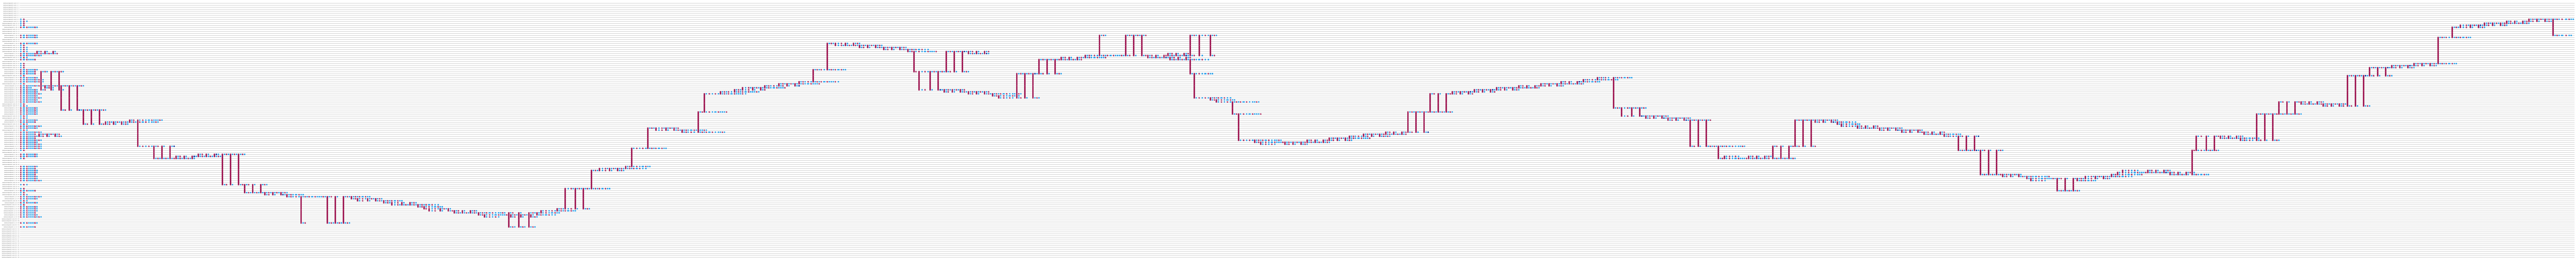

In [15]:
print(f"Transpiled without AI -> Depth: {circuit_ai_false.depth()}, CNOTs: {circuit_ai_false.num_nonlocal_gates()}")
circuit_ai_false.draw(fold=-1, output="mpl", scale=0.2)

#### Qiskit Transpiler Service - with AI
Enable the AI-powered transpiler passes to see how they can potentially improve the optimization of your circuit.

<a id="exercise2"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 2:</b> 

Let's now use the Qiskit Transpiler service with the AI flag turned `on`. Ensure your environment is set up with the latest version of the Qiskit Transpiler Service. We'll continue to use the `ibm_brisbane` backend. Configure the transpiler with an optimization level of `3` and enable the AI flag to leverage advanced AI-powered optimizations. This setup will try to transpile your quantum circuits by utilizing AI to optimize gate counts and circuit depth.
</div>

In [17]:
transpiler_ai_true = TranspilerService(
    backend_name="ibm_brisbane",
    ai="true",
    optimization_level=3
)

In [18]:
# Submit your answer using following code

grade_lab3_ait_ex2(transpiler_ai_true) # Expected result type: TranspilerService

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [19]:
circuit_ai_true = transpiler_ai_true.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled with AI -> Depth: 275, CNOTs: 64


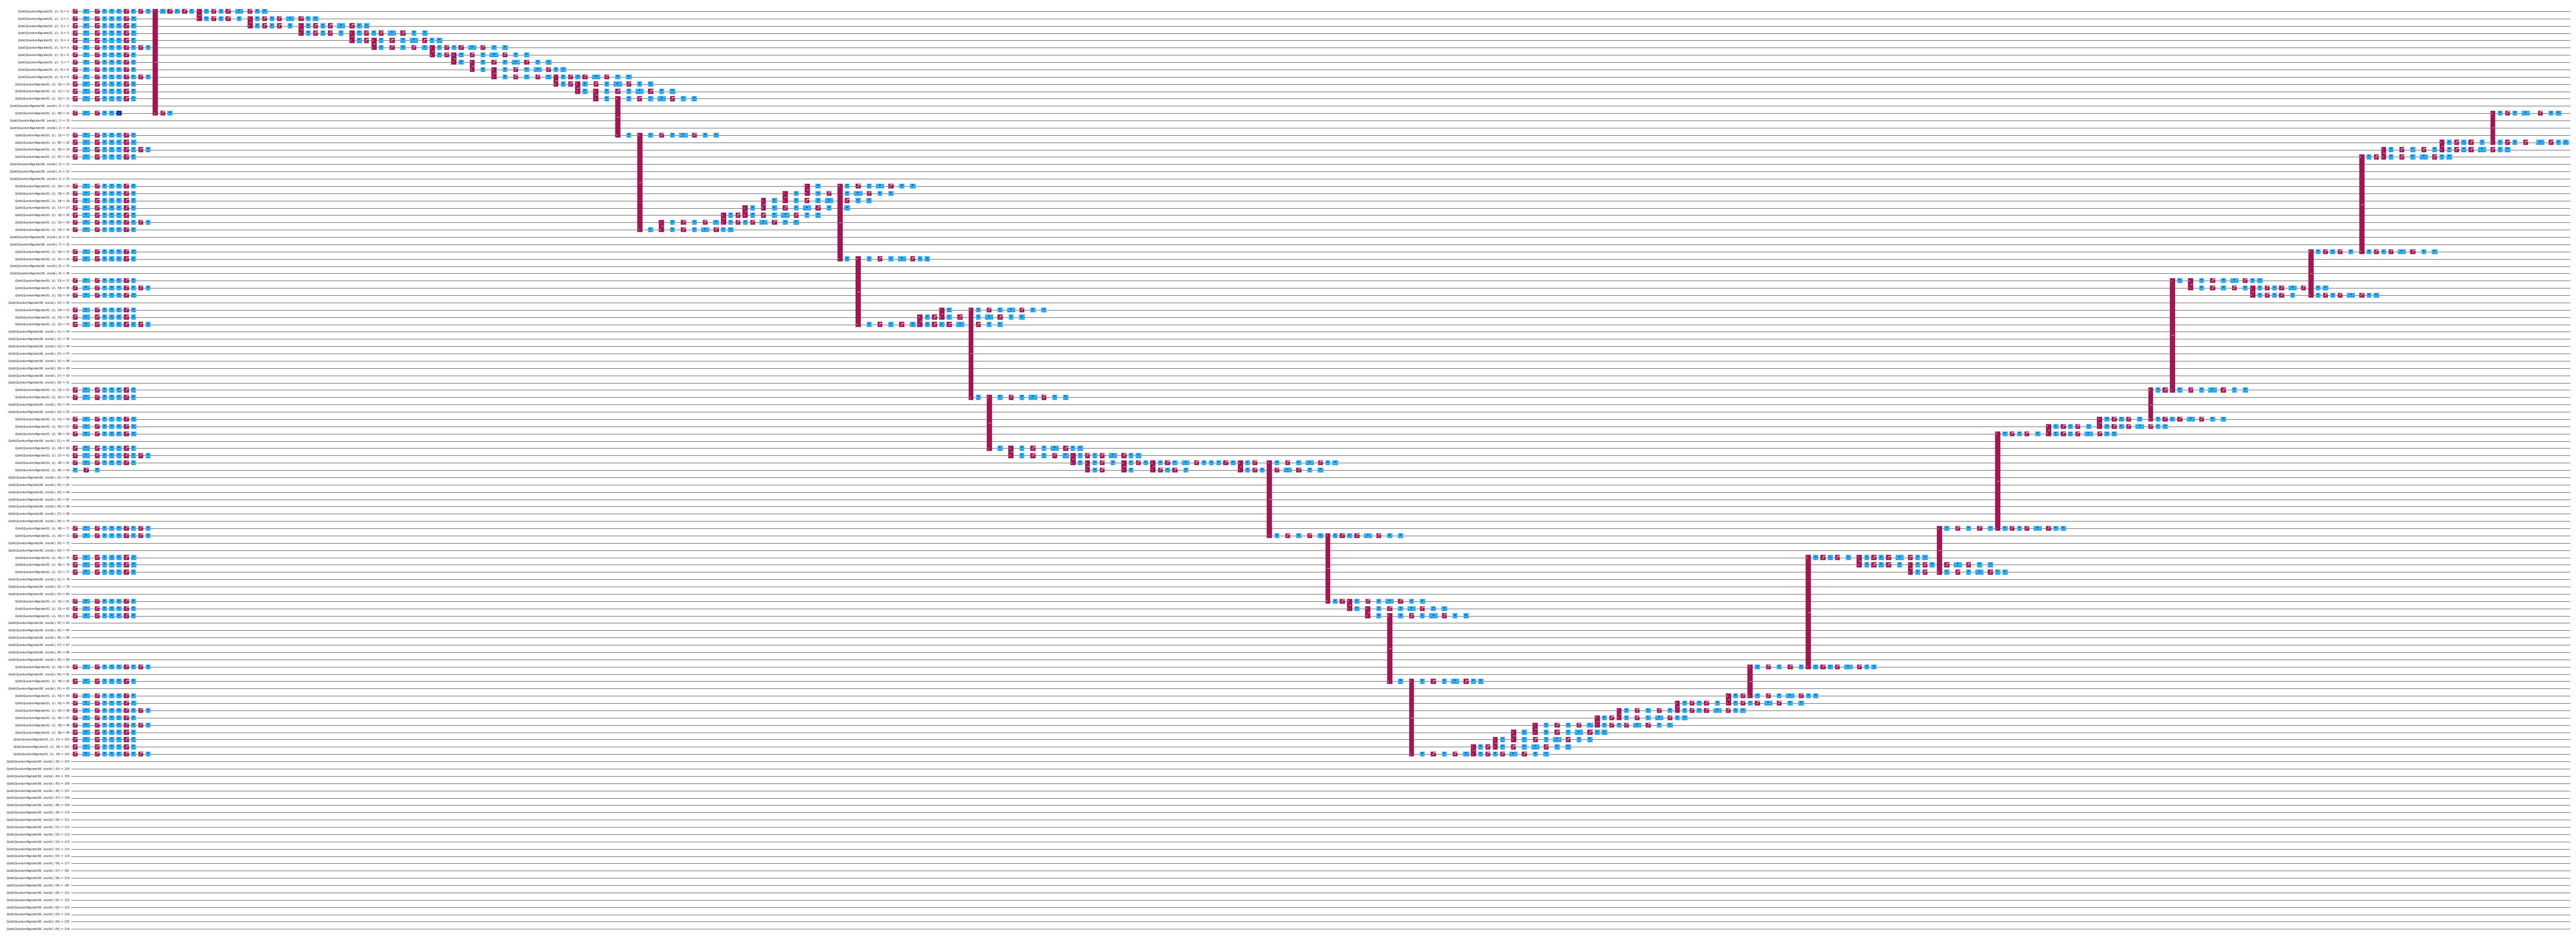

In [20]:
print(f"Transpiled with AI -> Depth: {circuit_ai_true.depth()}, CNOTs: {circuit_ai_true.num_nonlocal_gates()}")
circuit_ai_true.draw(fold=-1, output="mpl", scale=0.2)

## Step 3: Plotting the graph
Visualize the results of your transpilation and optimization efforts. Plot graphs to compare the performance metrics (e.g., depth, gate count) of the circuits transpiled with and without AI. This will help you understand the impact of AI-powered transpiler passes on your quantum circuit.

In [21]:
# Transpiling locally using Qiskit SDK
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

In [22]:
# Run and compile results
num_qubits = [11, 21, 41, 61, 81]
num_cnots_local = []
num_cnots_with_ai = []
num_cnots_without_ai = []

for nq in num_qubits:
    circuit = EfficientSU2(nq, entanglement="circular", reps=1).decompose()

    # Using the Transpiler locally on Qiskit 
    circuit_local = pm.run(circuit)
    # Using the transpiler service without AI
    circuit_without_ai = transpiler_ai_false.run(circuit)
    # Using the transpiler service with AI
    circuit_with_ai = transpiler_ai_true.run(circuit)

    num_cnots_local.append(circuit_local.num_nonlocal_gates())
    num_cnots_without_ai.append(circuit_without_ai.num_nonlocal_gates())
    num_cnots_with_ai.append(circuit_with_ai.num_nonlocal_gates())

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_tr

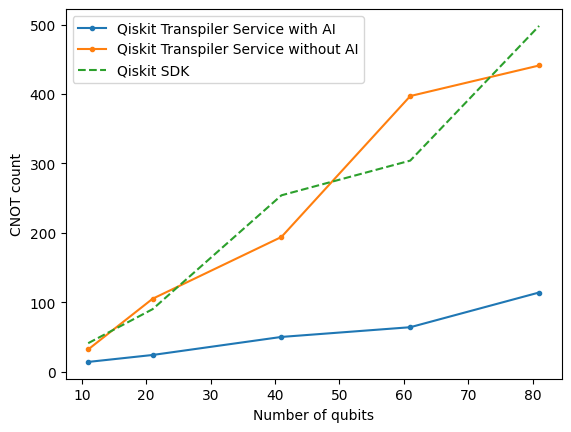

In [23]:
plt.plot(num_qubits, num_cnots_with_ai, '.-')
plt.plot(num_qubits, num_cnots_without_ai, '.-')
plt.plot(num_qubits, num_cnots_local, '--')
plt.xlabel("Number of qubits")
plt.ylabel("CNOT count")
plt.legend(["Qiskit Transpiler Service with AI", "Qiskit Transpiler Service without AI", "Qiskit SDK"])

<a id="exercise5"></a>
<div class="alert alert-block alert-warning">
    
<b> Bonus Exercise! </b> 

Now that you have experienced what the AI transpiler can do, try experimenting with various high-depth and high-width circuits using the Qiskit Transpiler Service! 

You can also check out AI-powered transpiler passes that work as a drop-in replacement of "traditional" Qiskit passes that you learned in Lab 2 for some transpiling tasks. You can find more about this [here](https://docs.quantum.ibm.com/transpile/ai-transpiler-passes). 

Post your results, and show off the most interesting improvements in gate depths and CNOT counts on Discord! 

Feel free to showcase your findings and discuss your achievements with the community!

</div>

Congratulations on completing the AI Transpiler section! You've had the opportunity to explore the cutting-edge capabilities of AI-powered transpiler passes in Qiskit. This innovative feature leverages AI to optimize your quantum circuits and offers to make them more efficient and effective for execution. As you continue to experiment with these AI-driven optimizations, you'll be able to push the boundaries of quantum computing even further. Keep refining your skills and exploring the potential of AI in quantum development. Great job, and keep up the fantastic work!

# Additional information

**Created by:** Vishal Sharathchandra Bajpe, David Kremer

**Advised by:** Junye Huang, Juan Cruz Benito

**Version:** 1.4.2